# **PROJECT: TELCO CUSTOMER CHURN ANALYSIS**

## **Project Overview:**

This project focuses on **predicting customer churn for a telecom company** using the IBM Telco Customer Churn dataset. The goal is to **identify key factors influencing churn and build machine learning models to proactively retain customers**. 

A comprehensive **Exploratory Data Analysis (EDA)** was performed to assess data quality, analyze churn patterns, and visualize key trends across demographics, contracts, payments, and services. The data was cleaned, missing values handled, irrelevant columns removed, and **categorical/numerical features encoded and scaled**.

Two baseline models – **Logistic Regression (with class weighting)** and **Random Forest (with SMOTE for class imbalance)** – were trained and **evaluated using accuracy, precision, recall, F1-score, and ROC-AUC**. 

**Feature importance analysis highlighted critical drivers of churn such as contract type, tenure, monthly charges, and payment methods**. 

The project concludes with **business insights and actionable recommendations** to help design effective retention strategies.

## **Import Libraries**

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Exploration**

In [50]:
# load the Dataset
customer_churn_df = pd.read_excel('src/Telco_customer_churn.xlsx')
customer_churn_df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [51]:
customer_churn_df.columns = customer_churn_df.columns.str.replace(' ', '_')

## **Dataset Overview**

**1. What is the total number of rows and columns in the dataset?**

In [52]:
customer_churn_df.shape

(7043, 33)

- There are **33** columns and **7043** rows(entries) in this dataset.

**2. What are the data types of each column?**

In [53]:
customer_churn_df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip_Code               int64
Lat_Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn_Label           object
Churn_Value            int64
Churn_Score            int64
CLTV                   int64
Churn_Reason          object
dtype: object

**3. Which columns are categorical, numerical, or binary?**

In [54]:
numerical_columns = customer_churn_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical Columns:\n", numerical_columns)

categorical_columns = customer_churn_df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical Columns:\n", categorical_columns)

binary_columns = [col for col in customer_churn_df.columns if customer_churn_df[col].nunique() == 2]
print("\nBinary Columns:\n", binary_columns)

Numerical Columns:
 ['Count', 'Zip_Code', 'Latitude', 'Longitude', 'Tenure_Months', 'Monthly_Charges', 'Churn_Value', 'Churn_Score', 'CLTV']

Categorical Columns:
 ['CustomerID', 'Country', 'State', 'City', 'Lat_Long', 'Gender', 'Senior_Citizen', 'Partner', 'Dependents', 'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method', 'Total_Charges', 'Churn_Label', 'Churn_Reason']

Binary Columns:
 ['Gender', 'Senior_Citizen', 'Partner', 'Dependents', 'Phone_Service', 'Paperless_Billing', 'Churn_Label', 'Churn_Value']


**4. Are there irrelevant columns (e.g., customerID) that should be dropped?**

In [55]:
if "CustomerID" in customer_churn_df.columns:
    print("\nIrrelevant column detected: CustomerID (likely to drop).")


Irrelevant column detected: CustomerID (likely to drop).


**5. How many unique values are there in each categorical variable?**

In [56]:
unique_counts_cat = customer_churn_df[categorical_columns].nunique().sort_values(ascending=False)
print("Unique Value Counts for Categorical Columns:\n",unique_counts_cat)

Unique Value Counts for Categorical Columns:
 CustomerID           7043
Total_Charges        6531
Lat_Long             1652
City                 1129
Churn_Reason           20
Payment_Method          4
Internet_Service        3
Device_Protection       3
Streaming_Movies        3
Contract                3
Tech_Support            3
Streaming_TV            3
Online_Backup           3
Multiple_Lines          3
Online_Security         3
Gender                  2
Phone_Service           2
Dependents              2
Partner                 2
Senior_Citizen          2
Paperless_Billing       2
Churn_Label             2
Country                 1
State                   1
dtype: int64


## **Data Quality Checks**

**1. Are there missing values in any column?**

In [57]:
print("\nMissing Values in Each Column:")
customer_churn_df.isnull().sum()


Missing Values in Each Column:


CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip_Code                0
Lat_Long                0
Latitude                0
Longitude               0
Gender                  0
Senior_Citizen          0
Partner                 0
Dependents              0
Tenure_Months           0
Phone_Service           0
Multiple_Lines          0
Internet_Service        0
Online_Security         0
Online_Backup           0
Device_Protection       0
Tech_Support            0
Streaming_TV            0
Streaming_Movies        0
Contract                0
Paperless_Billing       0
Payment_Method          0
Monthly_Charges         0
Total_Charges           0
Churn_Label             0
Churn_Value             0
Churn_Score             0
CLTV                    0
Churn_Reason         5174
dtype: int64

- There are **5174** missing values out of **7043** entries in **Churn_Reason** column.

**2. Are there blank spaces stored as empty strings?**

In [58]:
blank_counts = (customer_churn_df.astype(str).apply(lambda x: x.str.strip().eq('').sum()))
print("\nBlank Values in Each Column:\n", blank_counts[blank_counts > 0])


Blank Values in Each Column:
 Total_Charges    11
dtype: int64


- Only **Total_Charges** column has **11** blank spaces stored as empty strings.

**3. Does TotalCharges contain non-numeric values?**

In [59]:
# checking column type
print("\nData Type of 'Total Charges':", customer_churn_df['Total_Charges'].dtype)

# converting to numeric
customer_churn_df['TotalCharges_numeric'] = pd.to_numeric(customer_churn_df['Total_Charges'], errors='coerce')

# Reporting how many values failed conversion
n_coerced = customer_churn_df['TotalCharges_numeric'].isna().sum()
print(f"Non-numeric/missing after conversion: {n_coerced}")

# If any coercion happened, display them
if n_coerced > 0:
    print("\nProblematic values:")
    print(customer_churn_df.loc[customer_churn_df['TotalCharges_numeric'].isna(), 'Total_Charges'].unique())


Data Type of 'Total Charges': object
Non-numeric/missing after conversion: 11

Problematic values:
[' ']


- Yes. **Total_Charges** column contains **11** non-numeric entries, which are stored as **blank spaces (' ')**.

**4. Are there duplicate customerID entries?**

In [60]:
dup_cust_id_count = customer_churn_df['CustomerID'].duplicated().sum()
print("Number of duplicate CustomerID entries:", dup_cust_id_count)

Number of duplicate CustomerID entries: 0


- No, there are **0** duplicate entries in CustomerID col.

**5. Is TotalCharges approximately equal to MonthlyCharges × tenure? (Sanity Check)**

In [61]:
customer_churn_df['calc_total'] = customer_churn_df['Monthly_Charges'] * customer_churn_df['Tenure_Months']
customer_churn_df['total_diff'] = (customer_churn_df["TotalCharges_numeric"] - customer_churn_df['calc_total']).abs()

print("Distribution of Differences:")
customer_churn_df['total_diff'].describe()


Distribution of Differences:


count    7032.000000
mean       45.089157
std        49.899711
min         0.000000
25%         9.437500
50%        28.650000
75%        63.700000
max       373.250000
Name: total_diff, dtype: float64

- **Sanity Check:**
I compared Total_Charges with Monthly_Charges × Tenure_Months. The values are **approximately related but not exactly equal**. The **average difference** is about **45 units**, with **most customers showing differences under 64 units**. This indicates that while Total_Charges is generally proportional to Monthly_Charges and Tenure_Months, it may also include other billing adjustments (e.g., taxes, partial months, or additional services).

## **Data Cleaning and Preparation**

In [62]:
# handling TotalCharges_numeric NaNs

customer_churn_df['TotalCharges_numeric'] = customer_churn_df['TotalCharges_numeric'].fillna(0) # filling with 0, bcz these customers haven't paid any bill yet (new customer)
print("\nCheck non-numeric values again: ", customer_churn_df['TotalCharges_numeric'].isna().sum())


# handling Churn_Reason col missing values

customer_churn_df['Churn_Reason'] = customer_churn_df['Churn_Reason'].fillna("Not Applicable") # missing for customers whose churn=0
print("\nCheck Missing values in Churn_Reason again: ",customer_churn_df['Churn_Reason'].isnull().sum())

# dropping CustomerID - unique identifier, useless for ml

customer_churn_df = customer_churn_df.drop(columns=['CustomerID'])
print("\nCheck columns: ", customer_churn_df.columns.tolist())

# check duplicates

print("\nDuplicate rows:", customer_churn_df.duplicated().sum())



Check non-numeric values again:  0

Check Missing values in Churn_Reason again:  0

Check columns:  ['Count', 'Country', 'State', 'City', 'Zip_Code', 'Lat_Long', 'Latitude', 'Longitude', 'Gender', 'Senior_Citizen', 'Partner', 'Dependents', 'Tenure_Months', 'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method', 'Monthly_Charges', 'Total_Charges', 'Churn_Label', 'Churn_Value', 'Churn_Score', 'CLTV', 'Churn_Reason', 'TotalCharges_numeric', 'calc_total', 'total_diff']

Duplicate rows: 0


**After Data Cleaning**

- **No non-numeric** values remain in **TotalCharges_numeric**. Missing entries were filled with **0**, as these customers are new and have not paid any bills yet.
- **No missing values** are left in **Churn_Reason**. The missing entries were replaced with **"Not Applicable"**, since customers who have not churned naturally do not have a churn reason.
- **CustomerID** column was **dropped** because it is just an identifier and does not provide any useful information for analysis or machine learning models.
- **No duplicate rows** were found in the dataset.

## **Target Variable Analysis**

**1. What is the churn rate (%)?**


Churn Counts:
 Churn_Label
No     5174
Yes    1869
Name: count, dtype: int64

Churn Rate: 26.54%


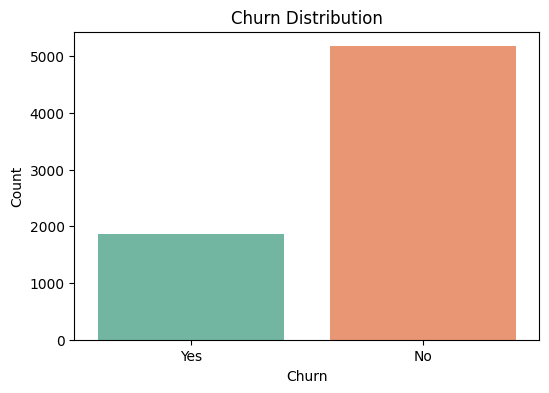

In [63]:
churn_counts = customer_churn_df['Churn_Label'].value_counts()
churn_rate = churn_counts['Yes'] / churn_counts.sum() * 100

print("\nChurn Counts:\n", churn_counts)
print(f"\nChurn Rate: {churn_rate:.2f}%")

# Distribution of Churn (Yes/No)
plt.figure(figsize=(6,4))
sns.countplot(data=customer_churn_df, x='Churn_Label', hue='Churn_Label',palette='Set2',legend=False)
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()


**2. Is the target variable (Churn) balanced or imbalanced?**

In [64]:
if churn_rate < 30:
    balance_status = "Imbalanced (fewer churned customers)"
elif churn_rate > 70:
    balance_status = "Imbalanced (most customers churned)"
else:
    balance_status = "Fairly Balanced"
    
print(f"\nBalance Status: {balance_status}")


Balance Status: Imbalanced (fewer churned customers)


**3. Which churn value is more frequent?**

In [65]:
most_frequent_churn_value = customer_churn_df['Churn_Label'].mode()[0]
print("Most Frequent (mode):", most_frequent_churn_value)

Most Frequent (mode): No


- Churn Rate = 26.54%
- Imbalanced - (Yes = 26.5%, No = 73.5%)
- Most frequent Value = No

## **Univariate Analysis**

**1.1. Distribution of Tenure**

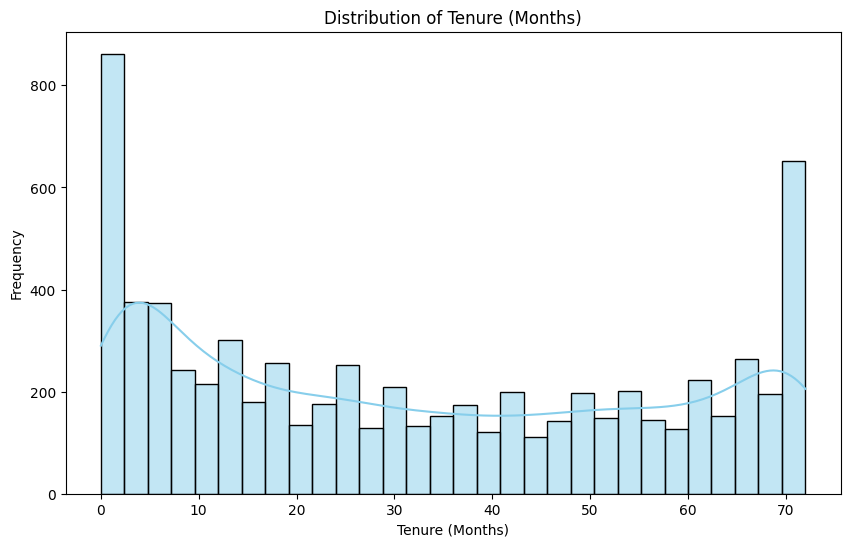

In [66]:
# Distribution of Tenure 

plt.figure(figsize=(10, 6))
sns.histplot(customer_churn_df['Tenure_Months'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Tenure (Months)")
plt.xlabel("Tenure (Months)")
plt.ylabel("Frequency")
plt.show()

**Observations:**

- **High at 0–1 months:** Many new customers join but churn early.
- **Drop at 10–50 months:** Fewer mid-tenure customers → people either leave early or stay long-term.
- **High at 60–72 months:** Strong base of loyal, long-term subscribers.
- **Bimodal distribution:** Two clear groups → short-term churners vs. long-term loyal users.

**Insights**

> Early churn is a major issue → retention weak in the first few months.

> Customers who stay past the early phase are likely to remain long-term.

> Focus on **onboarding, engagement, and value delivery in the first 3–6 months**.

> Leverage existing **loyal customers** as a business strength.

**1.2. Distribution of Monthly_Charges**

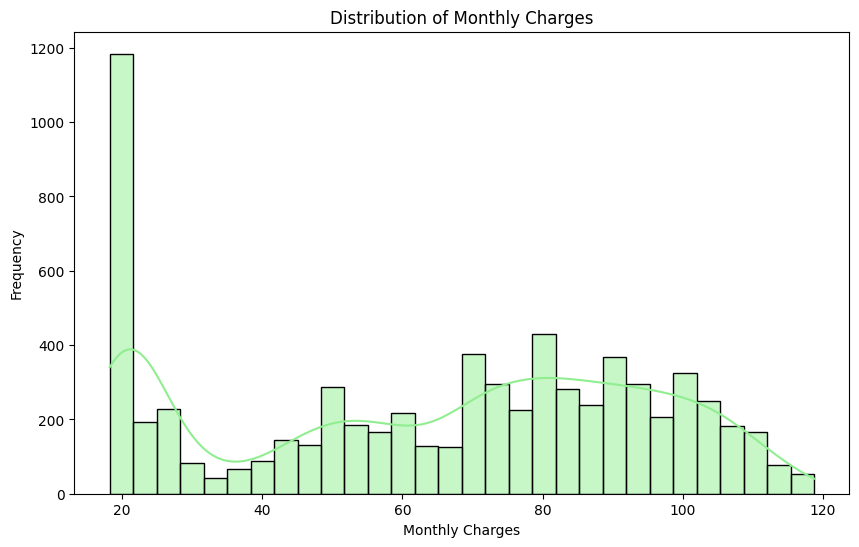

In [67]:
# Distribution of Monthly Charges

plt.figure(figsize=(10, 6))
sns.histplot(customer_churn_df['Monthly_Charges'], bins=30, kde=True, color='lightgreen')
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.show()

**Observations:**

- **Spike at ~$20:** Majority of customers are on low-cost/basic plans.
- **Spread between $40–$100:** Customers distributed across mid-tier plans.
- **Decline after $100:** Few customers on premium/high-value plans.
- **Skewed distribution:** Revenue base leans toward low-paying customers.

**Insights**

> Revenue largely depends on a **big pool of low-paying customers**.

> Presence of mid-to-high tier customers offers **growth potential**.

> Business should focus on **upselling low-paying users** to higher tiers while **retaining premium customers** for sustained revenue growth.

> Pricing strategy should balance **affordability vs. premium value**.

**1.3. Distribution of Total Charges**

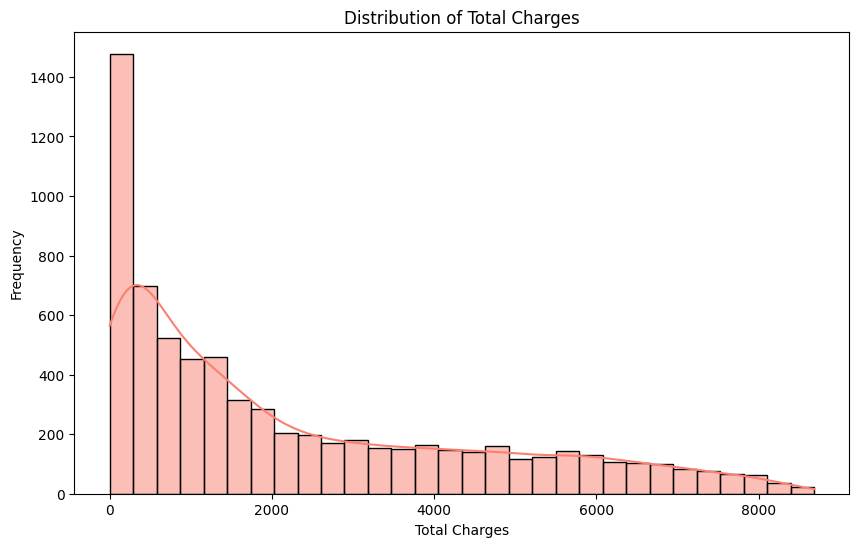

In [68]:
# Distribution of Total Charges

plt.figure(figsize=(10, 6))
sns.histplot(customer_churn_df['TotalCharges_numeric'], bins=30, kde=True, color='salmon')
plt.title("Distribution of Total Charges")
plt.xlabel("Total Charges")
plt.ylabel("Frequency")
plt.show()

**Observations:**

- **High at low charges (~0):** Many customers churn early with minimal spend.
- **Declining trend with higher charges:** Fewer customers accumulate large total payments.
- **Long tail up to ~9000+:** A small group of loyal customers contributes very high lifetime revenue.

**Insights**

> Revenue is **skewed toward a few long-term, high-value customers**.

> Most customers churn before generating significant total revenue.

> Business sustainability depends on **retaining and growing lifetime value (LTV) customers**.

> Focus should be on **early retention + loyalty programs** to convert more customers into high-value contributors.


**2. Most Common Internet Service Type**


Internet Service Distribution:
 Internet_Service
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


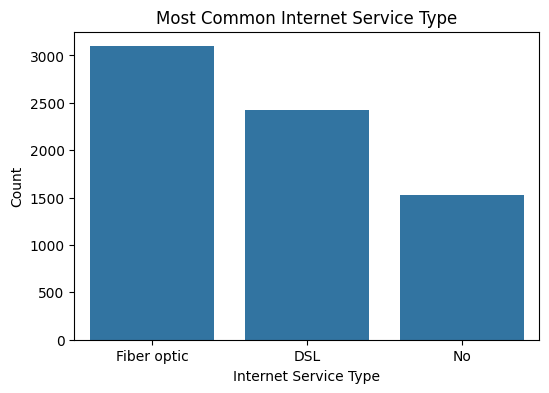

In [69]:
internet_service_distribution = customer_churn_df['Internet_Service'].value_counts()
print("\nInternet Service Distribution:\n", internet_service_distribution)

plt.figure(figsize=(6,4))
sns.countplot(x='Internet_Service', data=customer_churn_df, order=customer_churn_df['Internet_Service'].value_counts().index)
plt.title("Most Common Internet Service Type")
plt.xlabel("Internet Service Type")
plt.ylabel("Count")
plt.show()

**Observations:**

- **Fiber optic (3096 customers)** → Most common service type.
- **DSL (2421 customers)** → Second most common.
- **No internet service (1526 customers)** → Small segment without internet.

**Insights**

> **Fiber optic dominates** → Majority of customers use fiber-optic internet, meaning it is the company’s **core offering** and also the **main revenue driver**.

> Since fiber users are the largest group, their **satisfaction/retention directly impacts churn rates**.

> **DSL users** still form a significant base, but may represent **older or lower-speed plans** → potential **upsell opportunity** to fiber.

> The **“No internet” group** likely only uses phone/TV services. While smaller, they may represent **low-value customers** with lower churn risk (since fewer bundled services → less dissatisfaction).

**3. Most Popular Contract Type**


Contract Type Distribution:
 Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


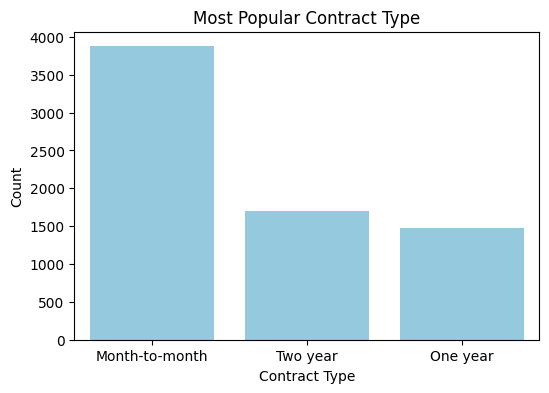

In [70]:
contract_distribution = customer_churn_df['Contract'].value_counts()
print("\nContract Type Distribution:\n", contract_distribution)

plt.figure(figsize=(6,4))
sns.countplot(x='Contract', data=customer_churn_df, order=customer_churn_df['Contract'].value_counts().index, color='skyblue')
plt.title("Most Popular Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.show()

**Observations:**

- **Month-to-month** → 3875 (most popular)
- **Two year** → 1695
- **One year** → 1473

**Insights**

> **Month-to-month contracts dominate** → customers like flexibility but are **high churn risk**.

> **Yearly contracts (1 & 2 years)** are fewer but provide **stable, loyal revenue**.

> Business should **encourage month-to-month users to shift to long-term contracts** with discounts or perks.

**4. Most Used Payment Method**


Payment Method Distribution:
 Payment_Method
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


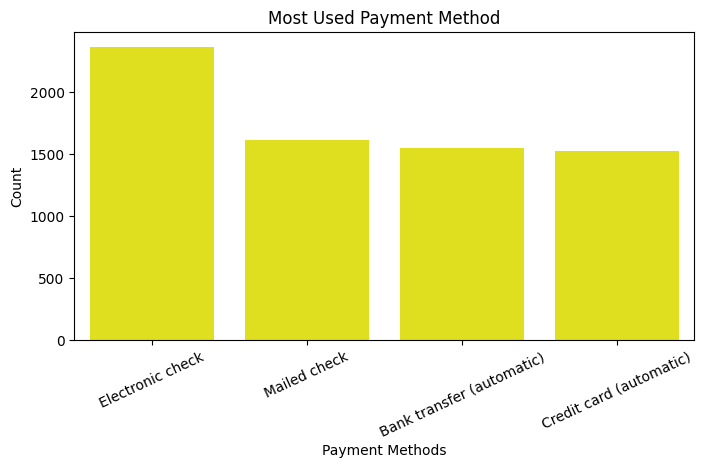

In [71]:
payment_method_distribution = customer_churn_df['Payment_Method'].value_counts()
print("\nPayment Method Distribution:\n", payment_method_distribution)

plt.figure(figsize=(8,4))
sns.countplot(x='Payment_Method', data=customer_churn_df, order=customer_churn_df['Payment_Method'].value_counts().index, color='yellow')
plt.title("Most Used Payment Method")
plt.xlabel("Payment Methods")
plt.ylabel("Count")
plt.xticks(rotation=25)
plt.show()

**Observations**

- **Electronic check** → 2365 (Most Used Payment Method)
- **Mailed check** → 1612
- **Bank transfer (auto)** → 1544
- **Credit card (auto)** → 1522

**Insights**

> **Most customers use electronic check** → convenient but risky, as they can stop anytime → **higher churn probability**.

> **Automatic payment methods** (credit card/bank transfer) indicate **loyal, committed customers** with lower churn.

> Business should **promote auto-pay methods** (discounts/rewards) → to lock in customers and reduce churn.

**5. Which service add-ons are most/least subscribed?**


Online_Security Distribution:
 Online_Security
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

Tech_Support Distribution:
 Tech_Support
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

Streaming_TV Distribution:
 Streaming_TV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

Streaming_Movies Distribution:
 Streaming_Movies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

Online_Backup Distribution:
 Online_Backup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

Device_Protection Distribution:
 Device_Protection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64


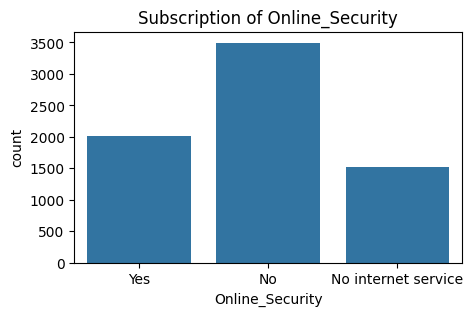

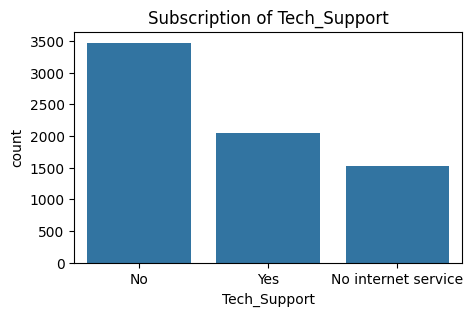

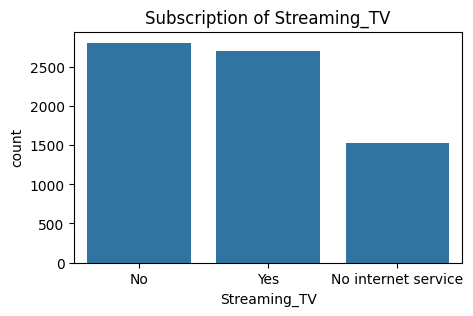

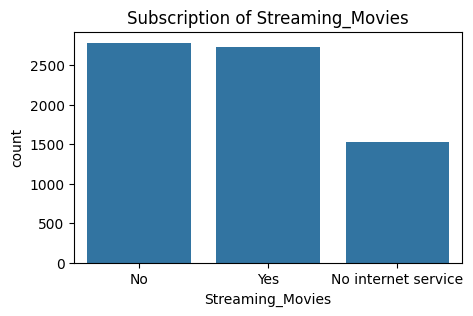

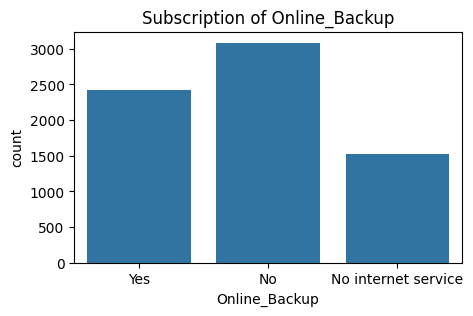

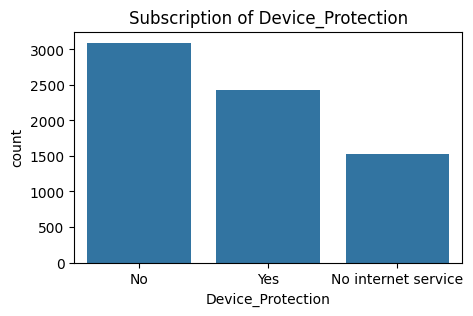

count    7043.000000
mean        2.037910
std         1.847682
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: bundle_depth, dtype: float64


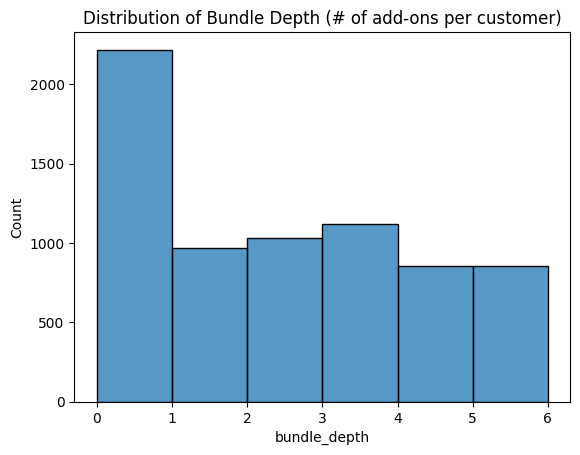

In [72]:
add_ons = ['Online_Security', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies', 'Online_Backup', 'Device_Protection']

for col in add_ons:
    add_ons_distribution = customer_churn_df[col].value_counts()
    print(f"\n{col} Distribution:\n", add_ons_distribution)
    
for col in add_ons:
    plt.figure(figsize=(5,3))
    sns.countplot(x=col, data=customer_churn_df)
    plt.title(f"Subscription of {col}")
    plt.show()

# Bundle depth
customer_churn_df['bundle_depth'] = customer_churn_df[add_ons].apply(lambda x: (x=='Yes').sum(), axis=1)
print(customer_churn_df['bundle_depth'].describe())

sns.histplot(customer_churn_df['bundle_depth'], bins=6, kde=False)
plt.title("Distribution of Bundle Depth (# of add-ons per customer)")
plt.show()

**Observations**

- **Streaming TV & Movies → Most subscribed (almost half of customers)**.
- **Online Backup & Device Protection** → Moderate adoption (~40–45%).
- **Online Security & Tech Support → Least subscribed (majority opted out)**.
- **No Internet group** → Consistently not eligible for add-ons.
- On average customers use **~2 add-ons (median = 2)**, but bundle depth ranges from **0 to 6**, showing **most stick to few add-ons** while only a small group subscribes to many.

**Insights**

> Customers **value entertainment add-ons** more than utility/security.

> **Streaming services drive engagement and revenue**.

> **Security & support add-ons need better marketing/bundling** to improve adoption.

> Opportunity: **bundle streaming + security** to increase ARPU and reduce churn.

## **Bivariate Analysis**

**1. Churn rate by Contract type**


Churn Rate by Contract Type (%):
 Churn_Label            No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858


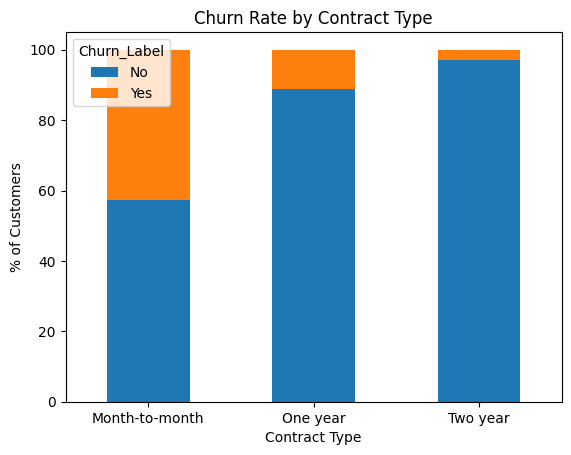

In [73]:
contract_churn = pd.crosstab(customer_churn_df['Contract'], customer_churn_df['Churn_Label'], normalize='index') * 100
print("\nChurn Rate by Contract Type (%):\n", contract_churn)

contract_churn.plot(kind='bar', stacked=True)
plt.title("Churn Rate by Contract Type")
plt.ylabel("% of Customers")
plt.xlabel("Contract Type")
plt.xticks(rotation=0)
plt.show()

**Observations + Insights**

- **Month-to-month contracts** → Highest churn **(~43%)** → very unstable group, major churn driver.  
- **One-year contracts** → Much lower churn **(~11%)** → customers more committed.  
- **Two-year contracts** → Lowest churn **(~3%)** → very loyal, provide stable revenue.  
- **Key takeaway:** **Longer contracts = lower churn** → company should incentivize **long-term signups** (discounts, perks, bundles).  


**2. Payment Method vs churn**

Payment Method Affect On Churn
Churn_Label                  No   Yes
Payment_Method                       
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1071
Mailed check               1304   308


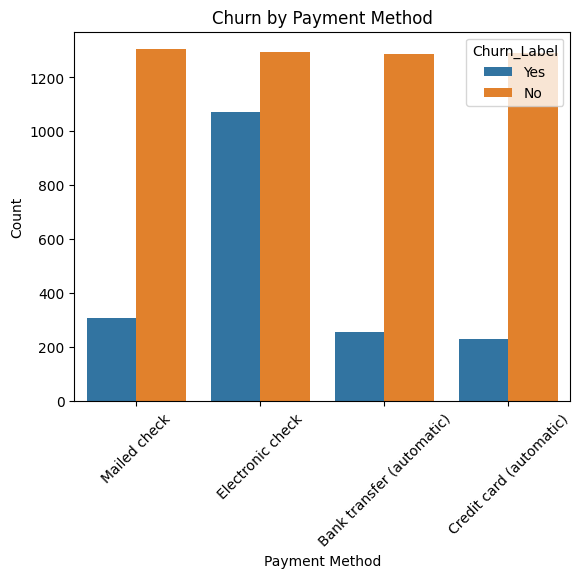

In [74]:
payment_vs_churn = pd.crosstab(customer_churn_df["Payment_Method"], customer_churn_df["Churn_Label"])
print("Payment Method Affect On Churn")
print(payment_vs_churn)

sns.countplot(x="Payment_Method", hue="Churn_Label", data=customer_churn_df)
plt.xticks(rotation=45)
plt.title("Churn by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.show()

**Observations + Insights**

- **Electronic check** → Highest churn (**~45%**) → customers paying manually are most likely to leave.  
- **Mailed check** → Lower churn (**~19%**) → more stable than electronic checks.  
- **Credit card (automatic)** → Low churn (**~15%**) → automatic payments increase loyalty.  
- **Bank transfer (automatic)** → Similar low churn (**~17%**) → stable, loyal customers.  
- **Key takeaway:** Automatic payment methods (**credit card, bank transfer**) are strongly linked to **lower churn** → business should encourage customers to switch to auto-pay options with perks or discounts.  


**3. Churn by Paperless Billing** 


Churn Rate by Paperless Billing (%):
 Churn_Label               No        Yes
Paperless_Billing                      
No                 83.669916  16.330084
Yes                66.434908  33.565092


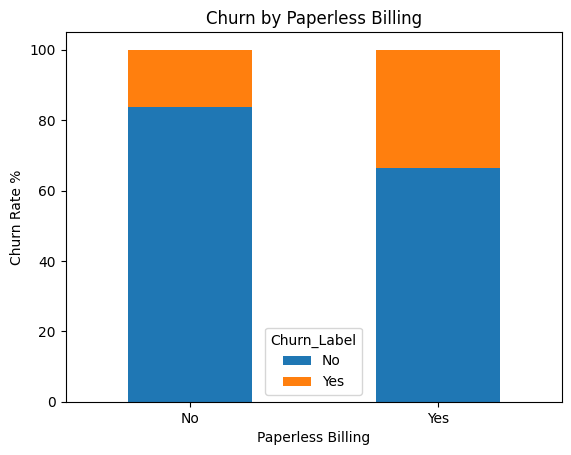

In [75]:
paperless = pd.crosstab(customer_churn_df['Paperless_Billing'], customer_churn_df['Churn_Label'], normalize='index')*100
print("\nChurn Rate by Paperless Billing (%):\n", paperless)

paperless.plot(kind='bar', stacked=True)
plt.title("Churn by Paperless Billing")
plt.ylabel("Churn Rate %")
plt.xlabel("Paperless Billing")
plt.xticks(rotation=0)
plt.show()

**Observations + Insights**

- **Without Paperless Billing (Paper bills)** → Churn **~16%** → very stable, loyal group.  
- **With Paperless Billing (Online bills)** → Churn **~34%** → almost double the churn rate.  
- **Key takeaway:** Paperless billing customers are **less committed and more churn-prone**, likely due to links with **month-to-month contracts**.  
- **Business should offset this risk** by pairing Paperless Billing with **auto-pay discounts or loyalty perks**.  

**4. Churn by Internet Service Type**


Churn Rate by Internet Service Type (%):
 Churn_Label              No        Yes
Internet_Service                      
DSL               81.040892  18.959108
Fiber optic       58.107235  41.892765
No                92.595020   7.404980


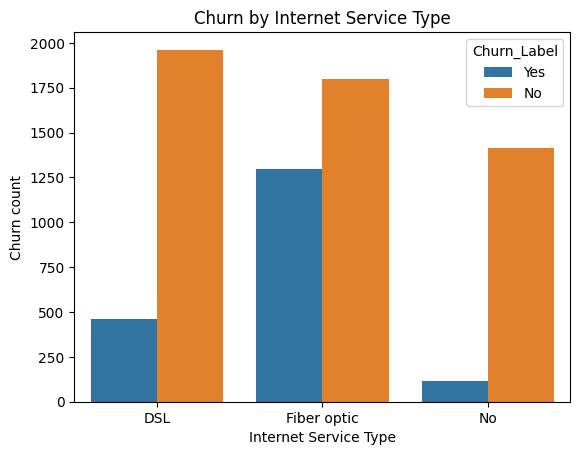

In [76]:
internet_service_vs_churn = pd.crosstab(customer_churn_df['Internet_Service'], customer_churn_df['Churn_Label'], normalize='index') * 100
print("\nChurn Rate by Internet Service Type (%):\n", internet_service_vs_churn)

sns.countplot(x="Internet_Service", hue="Churn_Label", data=customer_churn_df)
plt.title("Churn by Internet Service Type")
plt.xlabel("Internet Service Type")
plt.ylabel("Churn count")
plt.show()

**Observations + Insights**

- **DSL** → Churn **~19%** → relatively stable group, fewer switchers.  
- **Fiber optic** → Churn **~42%** → highest churn, nearly double DSL → major risk group.  
- **No internet service** → Churn **~7%** → very loyal group, least likely to leave.  
- **Key takeaway:** Fiber optic customers drive most churn → business should **improve service quality, pricing, and bundle offers** to retain them, while **leveraging DSL loyalty** and **upselling internet to “No service” users**.  

**5. Do customers with OnlineSecurity or TechSupport churn less?**


Churn Rate by Online Security (%):
 Churn_Label      Online_Security         No        Yes
0                             No  58.233276  41.766724
1            No internet service  92.595020   7.404980
2                            Yes  85.388806  14.611194

Churn Rate by Tech Support (%):
 Churn_Label         Tech_Support         No        Yes
0                             No  58.364526  41.635474
1            No internet service  92.595020   7.404980
2                            Yes  84.833659  15.166341


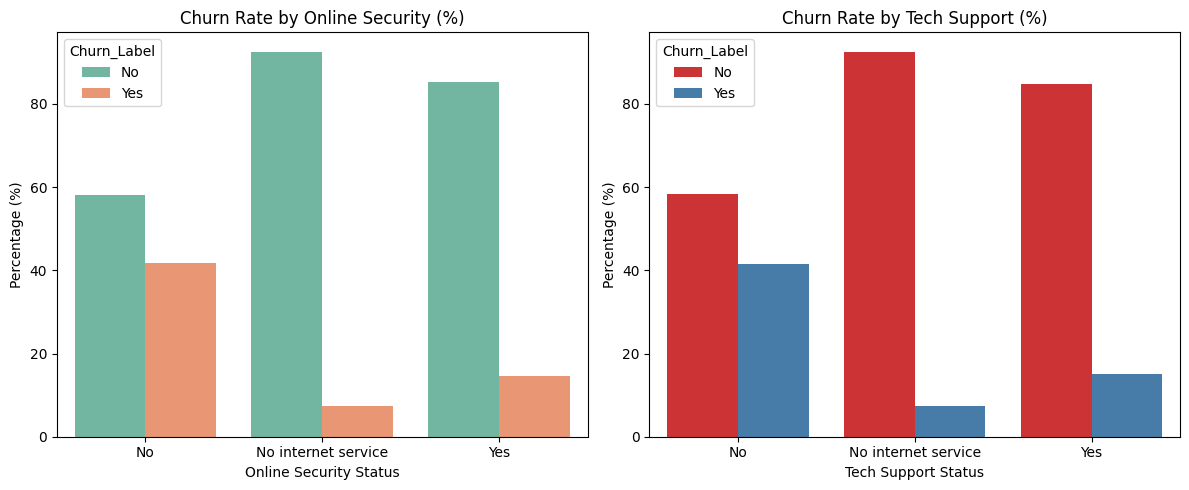

In [77]:
# Online Security - Calculate churn rate
online_security_rate = (
    pd.crosstab(customer_churn_df['Online_Security'], customer_churn_df['Churn_Label'], normalize='index') * 100
).reset_index()
print("\nChurn Rate by Online Security (%):\n", online_security_rate)

# Tech Support - Calculate churn rate
tech_support_rate = (
    pd.crosstab(customer_churn_df['Tech_Support'], customer_churn_df['Churn_Label'], normalize='index') * 100
).reset_index()
print("\nChurn Rate by Tech Support (%):\n", tech_support_rate)

fig, ax = plt.subplots(1, 2, figsize=(12,5))

# Online Security Plot (%)
online_melted = online_security_rate.melt(id_vars="Online_Security", var_name="Churn_Label", value_name="Percent")
sns.barplot(data=online_melted, x="Online_Security", y="Percent", hue="Churn_Label", ax=ax[0], palette="Set2")
ax[0].set_title("Churn Rate by Online Security (%)")
ax[0].set_xlabel("Online Security Status")
ax[0].set_ylabel("Percentage (%)")

# Tech Support Plot (%)
tech_melted = tech_support_rate.melt(id_vars="Tech_Support", var_name="Churn_Label", value_name="Percent")
sns.barplot(data=tech_melted, x="Tech_Support", y="Percent", hue="Churn_Label", ax=ax[1], palette="Set1")
ax[1].set_title("Churn Rate by Tech Support (%)")
ax[1].set_xlabel("Tech Support Status")
ax[1].set_ylabel("Percentage (%)")

plt.tight_layout()
plt.show()


**Observations + Insights**

- **Earlier finding:** Online Security & Tech Support are **least subscribed add-ons** (most customers don’t use them).  
- **Current finding:** Customers **with these add-ons churn far less (~15%)** vs those without **(~42%)**.  
- **Interpretation:**  
  - These add-ons are **not popular**, but they are **powerful churn reducers**.  
  - Customers who take them become **stickier and more loyal**.  
- **Business opportunity:**  
  - Increase adoption via **bundling, discounts, or free trial offers**.  
  - Especially target **new customers** (most churn in early months).  
  - Position these add-ons as **“loyalty tools”** that protect customers and reduce switching.  


**6. How does MonthlyCharges differ between churned and retained customers?**


Monthly Charges Summary by Churn Status:
               count       mean        std    min    25%     50%   75%     max
Churn_Label                                                                  
No           5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4  118.75
Yes          1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2  118.35


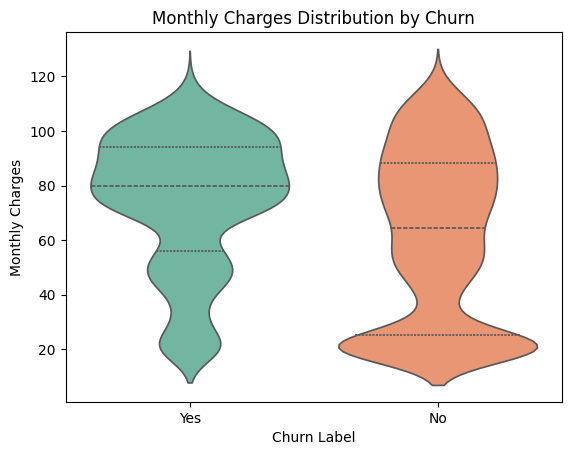

In [78]:
monthly_stats = customer_churn_df.groupby("Churn_Label")["Monthly_Charges"].describe()
print("\nMonthly Charges Summary by Churn Status:\n", monthly_stats)

sns.violinplot(
    x="Churn_Label",
    y="Monthly_Charges",
    data=customer_churn_df,
    hue= "Churn_Label",
    palette="Set2",
    inner="quartile",
    legend=False
)
plt.title("Monthly Charges Distribution by Churn")
plt.xlabel("Churn Label")
plt.ylabel("Monthly Charges")
plt.show()

**Observations + Insights**  

- **Retained (No churn):** Avg ≈ **$61**, Median ≈ **$64** → more low–mid range users.  
- **Churned (Yes churn):** Avg ≈ **$74**, Median ≈ **$80** → concentrated at higher charges.  
- **Key Insight:** Higher monthly charges → higher churn (price-sensitive customers).  
- **Business takeaway:** Reduce churn via **discounts, bundles, and clear value communication** for premium plans.  

**7. How does tenure differ between churned and retained customers?**


 Tenure Summary by Churn Status:
               count       mean        std  min   25%   50%   75%   max
Churn_Label                                                           
No           5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0
Yes          1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0


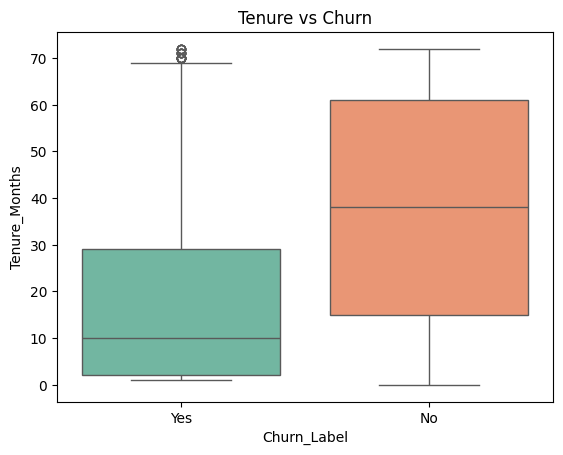

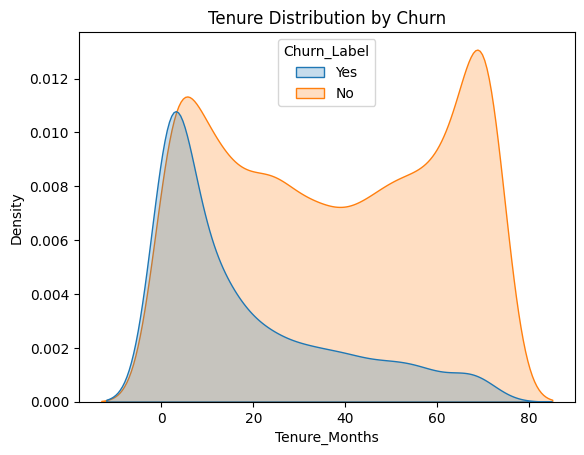

In [79]:
tenure_stats = customer_churn_df.groupby("Churn_Label")["Tenure_Months"].describe()
print("\n Tenure Summary by Churn Status:\n", tenure_stats)

# 📊 Boxplot
sns.boxplot(x="Churn_Label", y="Tenure_Months", data=customer_churn_df, palette="Set2", hue="Churn_Label", legend=False)
plt.title("Tenure vs Churn")
plt.show()

# 📊 KDE Plot
sns.kdeplot(data=customer_churn_df, x="Tenure_Months", hue="Churn_Label", fill=True)
plt.title("Tenure Distribution by Churn")
plt.show()

**Observations + Insights**

- **Retained (No churn):** Avg tenure ≈ **38 months**, Median ≈ **38** → longer stay (most 15–61 months).  
- **Churned (Yes churn):** Avg tenure ≈ **18 months**, Median ≈ **10** → shorter stay (most 2–29 months).  
- **From stats & plots:**  
  - Summary stats show **churners have much lower mean & median** than retained.  
  - Boxplot & KDE confirm churners cluster in **early months**, while retained spread into **longer durations**.  
- **Key Insight:** Churn risk is highest in the **first year**; customers surviving longer tend to stay loyal.  
- **Business takeaway:** Focus on **onboarding, early engagement, and value delivery** in first 12 months to cut churn.  


**8. Does senior citizen status affect churn?**


Churn Rate by Senior Citizen Status (%):
 Churn_Label            No        Yes
Senior_Citizen                      
No              76.393832  23.606168
Yes             58.318739  41.681261

Churn Count  by Senior Citizen Status:
 Churn_Label       No   Yes
Senior_Citizen            
No              4508  1393
Yes              666   476


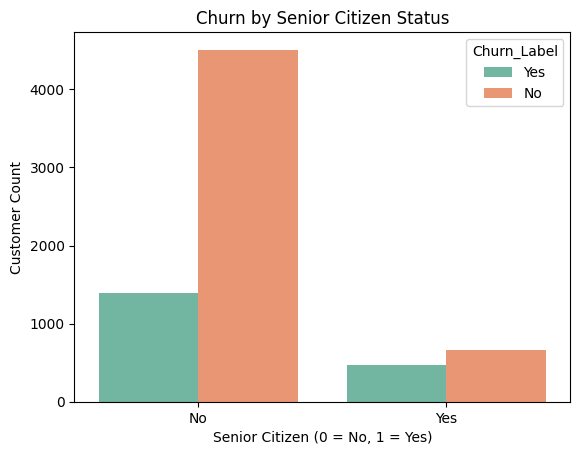

In [80]:
senior_citizen_churn_rate = pd.crosstab(customer_churn_df['Senior_Citizen'], customer_churn_df['Churn_Label'], normalize='index') * 100
print("\nChurn Rate by Senior Citizen Status (%):\n", senior_citizen_churn_rate)

senior_citizen_churn_count = pd.crosstab(customer_churn_df['Senior_Citizen'], customer_churn_df['Churn_Label']) 
print("\nChurn Count  by Senior Citizen Status:\n", senior_citizen_churn_count)

sns.countplot(x="Senior_Citizen", hue="Churn_Label", data=customer_churn_df, palette="Set2") 
plt.title("Churn by Senior Citizen Status") 
plt.xlabel("Senior Citizen (0 = No, 1 = Yes)") 
plt.ylabel("Customer Count") 
plt.show()

**Observations + Insights**

- **Non-seniors (0):** 76% retained (**4508**), 24% churned (**1393**) → largest & relatively stable group.  
- **Seniors (1):** 58% retained (**666**), 42% churned (**476**) → smaller base but nearly **2× churn risk**.  
- **Key Insight:** Non-seniors = **majority, lower churn**; Seniors = **minority, higher churn**.  
- **Business takeaway:** Focus on **extra support/discounts for seniors**, while **engaging non-seniors** to maintain loyalty.   

**9. Does gender affect churn?**


Churn Rate by Gender (%)
 Churn_Label         No        Yes
Gender                           
Female       73.079128  26.920872
Male         73.839662  26.160338


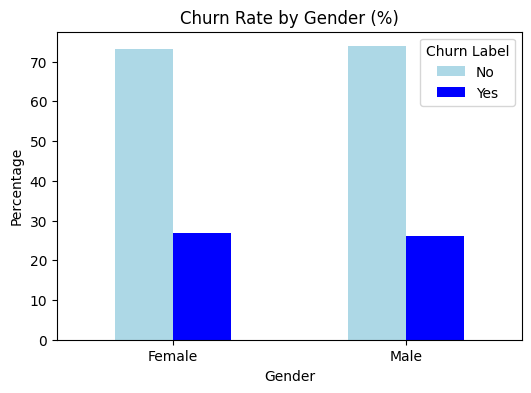

In [81]:
# Crosstab with percentages
churn_by_gender = pd.crosstab(
    customer_churn_df['Gender'], 
    customer_churn_df['Churn_Label'], 
    normalize='index'
) * 100

print("\nChurn Rate by Gender (%)\n", churn_by_gender)

# Plot using matplotlib directly
churn_by_gender.plot(
    kind="bar", 
    color=["lightblue", "blue"], 
    figsize=(6,4)
)

plt.title("Churn Rate by Gender (%)")
plt.ylabel("Percentage")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.legend(title="Churn Label")
plt.show()


**Observations + Insights**

- **Females:** 73% retained, 27% churned.  
- **Males:** 74% retained, 26% churned.  
- **Key Insight:** Churn rates are **almost identical** → gender has **no significant impact** on churn.  
- **Business takeaway:** Retention strategies should **not focus on gender**, but on other stronger churn drivers (contract type, payment method, tenure, etc.).  

**10. Do customers with dependents churn less?**


Churn Rate by Dependents (%)
 Churn_Label         No        Yes
Dependents                       
No           67.448301  32.551699
Yes          93.484942   6.515058


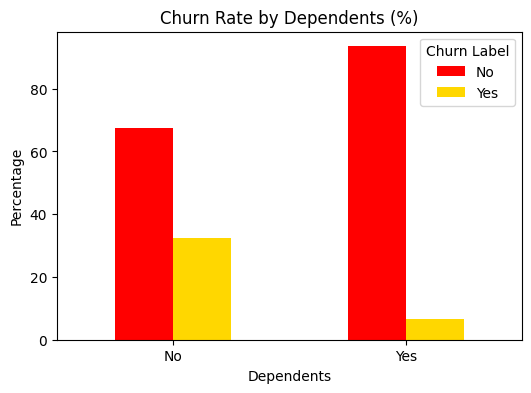

In [82]:
# Crosstab with percentages
churn_by_dependents = pd.crosstab(
    customer_churn_df['Dependents'], 
    customer_churn_df['Churn_Label'], 
    normalize='index'
) * 100

print("\nChurn Rate by Dependents (%)\n", churn_by_dependents)

# Plot using matplotlib directly
churn_by_dependents.plot(
    kind="bar", 
    color=["red", "gold"], 
    figsize=(6,4)
)

plt.title("Churn Rate by Dependents (%)")
plt.ylabel("Percentage")
plt.xlabel("Dependents")
plt.xticks(rotation=0)
plt.legend(title="Churn Label")
plt.show()


**Observations + Insights**

- **No dependents:** 67% retained, 33% churned → higher churn risk.  
- **With dependents:** 93% retained, 7% churned → very stable group.  
- **Key Insight:** Having dependents is strongly linked to **lower churn** (customers with families are more loyal).  
- **Business takeaway:** Focus retention on **single/independent customers** (no dependents), while nurturing loyal family customers with **family bundles & perks**.  

## **Multivariate Analysis**

**1. How does churn vary across Contract type and InternetService?**


Churn Rate by Contract and Internet Service (%)
 Churn_Label                             No        Yes
Contract       Internet_Service                      
Month-to-month DSL               67.784137  32.215863
               Fiber optic       45.394737  54.605263
               No                81.106870  18.893130
One year       DSL               90.701754   9.298246
               Fiber optic       80.705009  19.294991
               No                97.527473   2.472527
Two year       DSL               98.089172   1.910828
               Fiber optic       92.773893   7.226107
               No                99.216301   0.783699


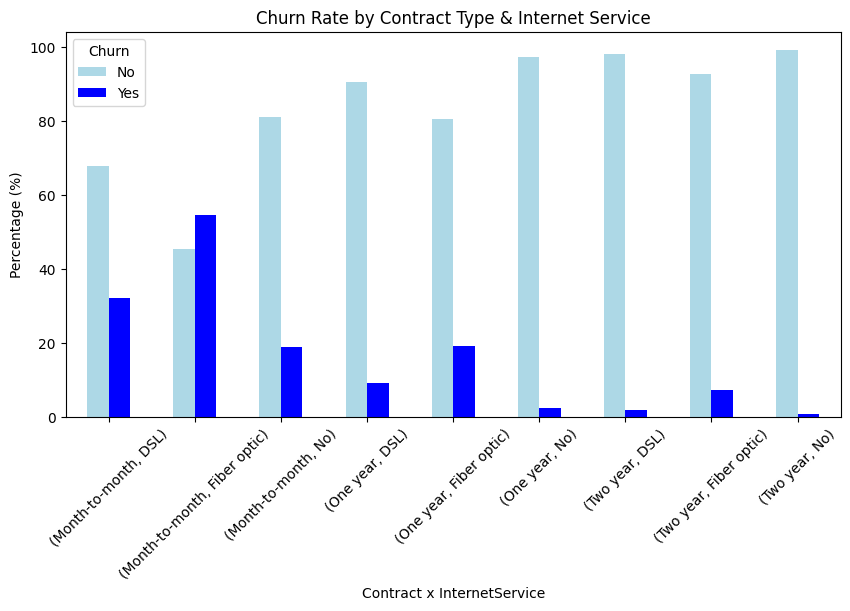

In [83]:
contract_internet_churn = pd.crosstab(
    [customer_churn_df['Contract'], customer_churn_df['Internet_Service']], 
    customer_churn_df['Churn_Label'], 
    normalize='index'
) * 100

print("\nChurn Rate by Contract and Internet Service (%)\n", contract_internet_churn)

contract_internet_churn.plot(
    kind="bar", figsize=(10,5),
    color=["lightblue","blue"]
)
plt.title("Churn Rate by Contract Type & Internet Service")
plt.ylabel("Percentage (%)")
plt.xlabel("Contract x InternetService")
plt.legend(title="Churn")
plt.xticks(rotation=45)
plt.show()

**Observations + Risk Segmentation (Contract × Internet Service)**

- **Month-to-month + Fiber optic → Highest churn (~55%) → 🔴 High risk**  
- **Month-to-month + DSL → ~32% churn → 🔴 High risk**  
- **Month-to-month + No internet → ~19% churn → 🟡 Medium risk**  
- **One-year + Fiber optic → ~19% churn → 🟡 Medium risk**  
- **One-year + DSL → ~9% churn → 🟢 Low risk**  
- **One-year + No internet → ~2% churn → 🟢 Very low risk**  
- **Two-year + Fiber optic → ~7% churn → 🟢 Low risk**  
- **Two-year + DSL → ~2% churn → 🟢 Very low risk**  
- **Two-year + No internet → <1% churn → 🟢 Very stable**  

**Key Takeaway**
- **Churn is driven by Month-to-month contracts (esp. Fiber optic).**  
- **Long-term contracts (1–2 years) dramatically reduce churn**, regardless of internet type.  
- Business should **shift customers from Month-to-month to longer contracts** with **discounts, bundles, or perks**.  

**2. How does churn vary by Payment Method and Paperless Billing together?**


Churn Rate by Payment Method & Paperless Billing (%)
 Churn_Label                                         No        Yes
Payment_Method            Paperless_Billing                      
Bank transfer (automatic) No                 88.973966  11.026034
                          Yes                79.124579  20.875421
Credit card (automatic)   No                 90.000000  10.000000
                          Yes                80.952381  19.047619
Electronic check          No                 67.255217  32.744783
                          Yes                50.229621  49.770379
Mailed check              No                 86.506276  13.493724
                          Yes                72.713415  27.286585


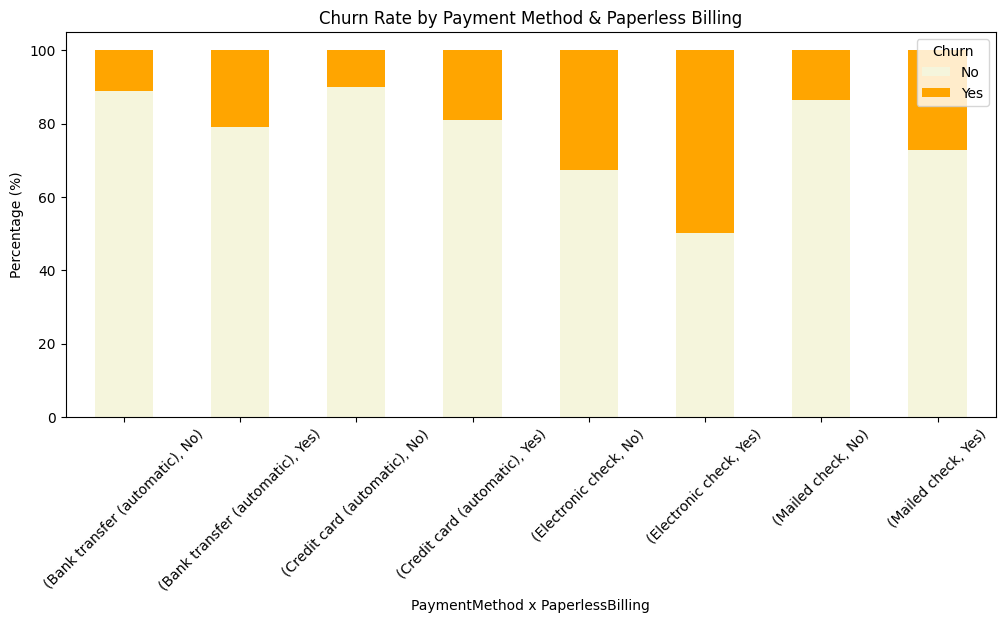

In [84]:
# Crosstab: PaymentMethod × PaperlessBilling
payment_paperless_churn = pd.crosstab(
    [customer_churn_df['Payment_Method'], customer_churn_df['Paperless_Billing']], 
    customer_churn_df['Churn_Label'], 
    normalize='index'
) * 100

print("\nChurn Rate by Payment Method & Paperless Billing (%)\n", payment_paperless_churn)

# Plot
payment_paperless_churn.plot(
    kind="bar", stacked=True, figsize=(12,5),
    color=["beige","orange"]
)
plt.title("Churn Rate by Payment Method & Paperless Billing")
plt.ylabel("Percentage (%)")
plt.xlabel("PaymentMethod x PaperlessBilling")
plt.xticks(rotation=45)
plt.legend(title="Churn")
plt.show()

**Observations + Insights**

- **Highest churn:** Electronic check + Paperless (~50%) 🔴  
- **High churn:** Electronic check + No Paperless (~33%) 🔴  
- **Moderate churn:** Mailed check or Auto-pay + Paperless (~19–27%) 🟡  
- **Lowest churn / Most loyal:** Auto-pay + No Paperless (~10–11%) 🟢  

**Key Takeaway:** Paperless billing increases churn risk; encouraging auto-pay and improving paperless experience can reduce churn.


**3. Are short-tenure, high-monthly-charge customers more likely to churn?**

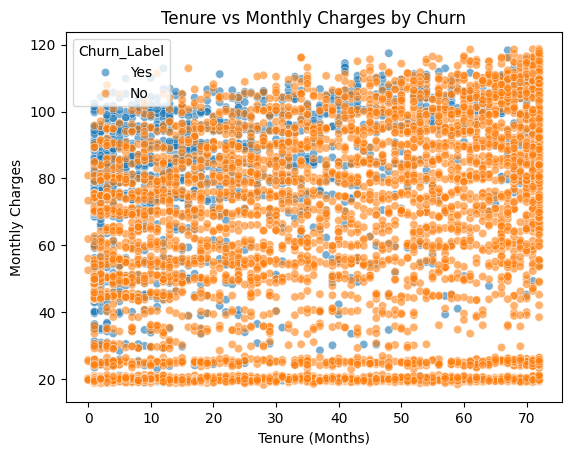

In [85]:
sns.scatterplot(
    data=customer_churn_df, 
    x="Tenure_Months", y="Monthly_Charges", 
    hue="Churn_Label", alpha=0.6
)
plt.title("Tenure vs Monthly Charges by Churn")
plt.xlabel("Tenure (Months)")
plt.ylabel("Monthly Charges")
plt.show()

**Observations + Insights**

- Yes — churn is highest among **low-tenure (<12 months)** and **high-charge (> $70–80)** customers.  
- Long-tenure customers show **lower churn**, even at higher charges.  
- Early-stage customers with lower charges also churn more than long-tenure ones. 

**4. How does churn change with the number of subscribed services?**


Churn Rate by Number of Services Subscribed (%)
 Churn_Label            No        Yes
Services_Count                      
0               56.250000  43.750000
1               78.339991  21.660009
2               56.526104  43.473896
3               65.321806  34.678194
4               72.787194  27.212806
5               77.992745  22.007255
6               87.428571  12.571429
7               94.208494   5.791506


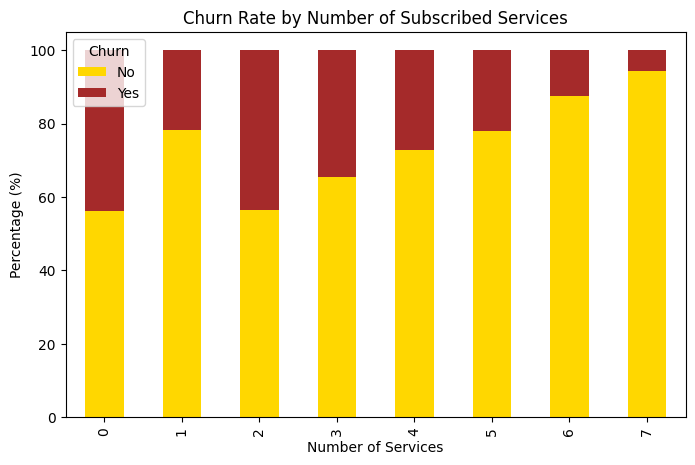

In [86]:
# Count number of subscribed services (binary columns like PhoneService, StreamingTV etc.)
service_cols = ['Phone_Service','Online_Security','Online_Backup','Device_Protection',
                'Tech_Support','Streaming_TV','Streaming_Movies']

customer_churn_df['Services_Count'] = customer_churn_df[service_cols].apply(lambda x: (x=='Yes').sum(), axis=1)

# Crosstab: Services_Count vs Churn
services_churn = pd.crosstab(
    customer_churn_df['Services_Count'], 
    customer_churn_df['Churn_Label'], 
    normalize='index'
) * 100

print("\nChurn Rate by Number of Services Subscribed (%)\n", services_churn)

# Plot
services_churn.plot(kind="bar", stacked=True, figsize=(8,5), color=["gold","brown"])
plt.title("Churn Rate by Number of Subscribed Services")
plt.xlabel("Number of Services")
plt.ylabel("Percentage (%)")
plt.legend(title="Churn")
plt.show()


**Observations + Insights**
- Customers with **0–2 services** show the **highest churn rates** (up to ~44%).  
- Churn decreases steadily as the **number of subscribed services increases**.  
- Customers with **6–7 services are highly loyal** (churn < 13%, even < 6% for 7 services).  

**Business Takeaway**
Encourage customers to **bundle more services**, as higher service adoption strongly reduces churn.  

**5. Do bundled services reduce churn more than single services?**


Churn Rate: Bundled vs Single Services (%)
 Churn_Label           No        Yes
Bundle_Status                      
Bundled        71.422505  28.577495
Single         77.582512  22.417488


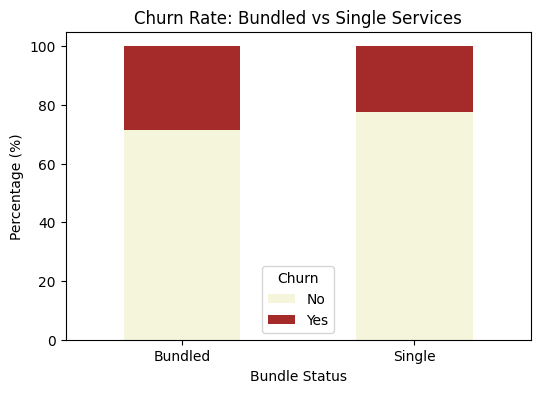

In [87]:
customer_churn_df['Bundle_Status'] = np.where(customer_churn_df['Services_Count'] > 1, "Bundled", "Single")

bundle_churn = pd.crosstab(
    customer_churn_df['Bundle_Status'], 
    customer_churn_df['Churn_Label'], 
    normalize='index'
) * 100

print("\nChurn Rate: Bundled vs Single Services (%)\n", bundle_churn)

bundle_churn.plot(kind="bar", stacked=True, figsize=(6,4), color=["beige","brown"])
plt.title("Churn Rate: Bundled vs Single Services")
plt.xlabel("Bundle Status")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.legend(title="Churn")
plt.show()

**Observations + Insights**
- **Bundled customers churn more (28.6%)** compared to **single-service customers (22.4%)**.  
- This is opposite to the general expectation that bundles reduce churn.  
- Indicates that customers taking bundles may face **higher bills, complexity, or dissatisfaction**, leading to higher churn.  

**Business Takeaway** 
Re-evaluate **bundle pricing, service quality, and customer experience**—bundles alone don’t guarantee retention.  

## **Business Insights** - based on the analysis performed above

**1. Which three features are most strongly related to churn?**

- **Contract Type** → Customers on **Month-to-Month** contracts churn the most.  
- **Tenure** → Customers in their **first year** show much higher churn compared to long-tenure customers.  
- **Payment Method** → Customers paying via **Electronic Check** churn at the highest rate.  

➡️ These **three features (Contract, Tenure, Payment Method)** are the strongest churn indicators.

**2. Which customer segment has the highest churn risk?**

- **New customers (tenure < 12 months)**.  
- On **Month-to-Month contracts**.  
- Using **Fiber Optic internet** service.  

➡️ Segment with **highest churn risk** = **New, short-tenure customers on Month-to-Month contracts with Fiber Optic service**.

**3. Which segment is high-value but high-risk?**

- Customers with **High Monthly Charges** (multi-service users).  
- Still on **Month-to-Month contracts**.  

➡️ **High-paying, multi-service customers on flexible contracts** are **valuable but at high churn risk**.

**4. What patterns indicate early-stage churn risk?**

- **Tenure < 1 year** is strongly linked with churn.  
- Customers in this group are often:  
  - On **Month-to-Month contracts**.  
  - Paying via **Electronic Check**.  
- Churn stabilizes significantly after ~2 years.  

➡️ **Early churn risk is highest for first-year customers with flexible contracts**.

**5, Which features should be targeted in retention strategies?**

- **Contract Type** → Encourage upgrades from Month-to-Month to Yearly contracts (discounts, bundles).  
- **Payment Method** → Incentivize switching from Electronic Check to Auto-pay or Credit Card.  
- **Tenure (new customers)** → Introduce first-year loyalty programs & welcome offers.  
- **High Charges / Multi-Service Bundles** → Protect high-value customers with personalized retention campaigns.  

➡️ **Focus retention on contracts, payment method, new customer experience, and high-charge customers**.

In [88]:
customer_churn_df.columns.tolist()

['Count',
 'Country',
 'State',
 'City',
 'Zip_Code',
 'Lat_Long',
 'Latitude',
 'Longitude',
 'Gender',
 'Senior_Citizen',
 'Partner',
 'Dependents',
 'Tenure_Months',
 'Phone_Service',
 'Multiple_Lines',
 'Internet_Service',
 'Online_Security',
 'Online_Backup',
 'Device_Protection',
 'Tech_Support',
 'Streaming_TV',
 'Streaming_Movies',
 'Contract',
 'Paperless_Billing',
 'Payment_Method',
 'Monthly_Charges',
 'Total_Charges',
 'Churn_Label',
 'Churn_Value',
 'Churn_Score',
 'CLTV',
 'Churn_Reason',
 'TotalCharges_numeric',
 'calc_total',
 'total_diff',
 'bundle_depth',
 'Services_Count',
 'Bundle_Status']

## **Machine Learning Model Training**

### **Import libraries**

In [89]:
# Modeling
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, classification_report,
    precision_recall_curve, average_precision_score
)

# Feature importance
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE

### **Step 1: Target & Features**

In [90]:
churn_df = customer_churn_df.copy()  # keep your original safe

# Target: encode Churn_Label (1=Yes, 0=No)
if churn_df['Churn_Label'].dtype == 'O':
    y = churn_df['Churn_Label'].map({'Yes':1, 'No':0}).astype(int)
else:
    y = churn_df['Churn_Label'].astype(int)
    
# Features: drop irrelevant columns 
cols_to_drop = ['Count','Country','State','City','Zip_Code','Lat_Long','Latitude','Longitude','Churn_Value','Churn_Score','Churn_Reason','Total_Charges']
X = churn_df.drop(columns=cols_to_drop + ['Churn_Label'], errors='ignore')

# --- Identify numeric & categorical automatically
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object','category','bool']).columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)


Numeric columns: ['Tenure_Months', 'Monthly_Charges', 'CLTV', 'TotalCharges_numeric', 'calc_total', 'total_diff', 'bundle_depth', 'Services_Count']
Categorical columns: ['Gender', 'Senior_Citizen', 'Partner', 'Dependents', 'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method', 'Bundle_Status']


### **Step 2: Preprocess (scaling, one hot encoding)**

In [91]:
# Preprocess numeric
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocess categorical
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


### **Step 3: Train/Test Split**

In [92]:
# Train-test split
# 80% training data, 20% testing data
# stratify=y -> y ke class proportions (Yes/No) dono sets me same rahi
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Output shapes aur churn rate (mean of y=1) in train and test sets
X_train.shape, X_test.shape, y_train.mean().round(4), y_test.mean().round(4)

((5634, 25), (1409, 25), np.float64(0.2654), np.float64(0.2654))

- Training and testing sets have the same churn rate of **26.54%**, meaning class distribution is well-preserved (stratified split worked).
- **Churners (~26.5%)** are significantly fewer than **non-churners (~73.5%)**, so this is a **moderate class imbalance** that should be handled.

### **Step 4: Handle Class Imbalance**

In [93]:
from imblearn.pipeline import Pipeline as ImbPipeline

log_reg_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])

rf_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(n_estimators=200, random_state=42))
])


- Class imbalance was handled by **adjusting class weights in Logistic Regression** and by **generating synthetic minority samples using SMOTE in Random Forest** (as SMOTE often works better with tree-based models than class weights) to ensure both models learn from the minority class effectively.

### **Step 5. Train Models**

In [94]:
# Logistic Regression
log_reg_pipeline.fit(X_train, y_train)

# Random Forest
rf_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Tenure_Months',
                                                   'Monthly_Charges', 'CLTV',
                                                   'TotalCharges_numeric',
                                                   'calc_total', 'total_diff',
                                                   'bundle_depth',
                                                   'Services_Count']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_...
                                                  ['Gender', 'Senior_Citizen',
                                                   'Partner', 'Dependents',
                                                   'Phone_Service',
                                                   'Multiple_Lines',
                                                   'Internet_Service',
                                                   'Online_Security',
                                                   'Online_Backup',
                                                   'Device_Protection',
                                                   'Tech_Support',
                                                   'Streaming_TV',
                                                   'Streaming_Movies',
                                                   'Contract',
                                                   'Paperless_Billing',
                                                   'Payment_Method',
                                                   'Bundle_Status'])])),
                ('smote', SMOTE(random_state=42)),
                ('clf',
                 RandomForestClassifier(n_estimators=200, random_state=42))])

### **Step 6: Evaluate Models**

In [95]:
# Logistic Regression Predictions
y_pred_log = log_reg_pipeline.predict(X_test) # predict => 0=not churn , 1= churn
y_prob_log = log_reg_pipeline.predict_proba(X_test)[:,1] # get =ve class probab

# Random Forest Predictions
y_pred_rf = rf_pipeline.predict(X_test)
y_prob_rf = rf_pipeline.predict_proba(X_test)[:,1]

# Metrics
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))
print("ROC-AUC (Logistic):", roc_auc_score(y_test, y_prob_log))

print("\nRandom Forest Report:\n", classification_report(y_test, y_pred_rf))
print("ROC-AUC (RF):", roc_auc_score(y_test, y_prob_rf))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.91      0.74      0.81      1035
           1       0.52      0.79      0.63       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409

ROC-AUC (Logistic): 0.8493063628613502

Random Forest Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      1035
           1       0.61      0.60      0.60       374

    accuracy                           0.79      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409

ROC-AUC (RF): 0.8369836472138263


**Observations**

> **Overall Performance**
- **Logistic Regression:** 75% accuracy  
- **Random Forest:** 79% accuracy → better at capturing churn patterns  

> **Class-wise Performance**
- **Non-churn (0):**
  - LR: High precision (0.91), lower recall (0.74)
  - RF: Balanced (Precision 0.86, Recall 0.86)
- **Churn (1):**
  - LR: Precision 0.52, Recall 0.79 → better recall
  - RF: Precision 0.61, Recall 0.60 → more balanced

> **F1-Score**
- LR (Churn): 0.63 → recall-focused
- RF (Churn): 0.60 → balanced  

> **ROC-AUC**
- LR: **0.849**
- RF: **0.837**

> **Key Insights**
- Logistic Regression is **better at catching churners (recall)** but less precise, which may lead to more false alarms.
- Random Forest is **more balanced**, predicting both churners and non-churners more consistently, but catches fewer actual churners.
- For a churn problem, **higher recall is often preferred** (better to flag more churners, even if some are false alarms).

> **Next Steps**
- Tune Random Forest, or validate with cross-validation or a hold-out test set.

### **Step 7: Feature Importance**

In [96]:
# Logistic Regression Coefficients
log_model = log_reg_pipeline.named_steps['clf']
feature_names = preprocessor.get_feature_names_out()
log_importance = pd.Series(log_model.coef_[0], index=feature_names).sort_values(key=abs, ascending=False)
print("Top Logistic Regression Features:\n", log_importance.head(10))

# Random Forest Feature Importance
rf_model = rf_pipeline.named_steps['clf']
rf_importance = pd.Series(rf_model.feature_importances_, index=feature_names).sort_values(ascending=False)
print("Top Random Forest Features:\n", rf_importance.head(10))


Top Logistic Regression Features:
 num__Tenure_Months                  -1.112818
cat__Dependents_Yes                 -0.923467
cat__Contract_Two year              -0.768592
cat__Dependents_No                   0.709872
cat__Contract_Month-to-month         0.680792
cat__Internet_Service_Fiber optic    0.616935
num__Monthly_Charges                -0.599160
cat__Internet_Service_DSL           -0.596987
num__TotalCharges_numeric            0.375813
cat__Paperless_Billing_No           -0.266955
dtype: float64
Top Random Forest Features:
 cat__Contract_Month-to-month            0.087450
num__Tenure_Months                      0.065109
num__TotalCharges_numeric               0.061297
num__calc_total                         0.060011
num__Monthly_Charges                    0.057962
num__CLTV                               0.057749
num__total_diff                         0.052454
cat__Payment_Method_Electronic check    0.048607
cat__Online_Security_No                 0.042735
cat__Tech_Support_No

**Observations**

- **Logistic Regression:**  
  - Negative values ↓ churn (e.g., longer tenure, having dependents, two-year contracts).  
  - Positive values ↑ churn (e.g., month-to-month contracts, fiber optic internet).  

- **Random Forest:**  
  - **Month-to-month contracts, tenure, and total charges** are top churn drivers.  
  - Focuses more on **payment method, online security, and tech support** as churn indicators.  

**Key Insight:** Both models highlight contract type & tenure as critical, but weight other factors differently due to model nature (linear vs. tree-based).


## **Step 8:  Business Recommendations – Translating Insights into Strategy**

Based on the churn analysis and feature importance results, the following **actionable strategies** are recommended:

> #### **1. Contract Type (Month-to-Month → Annual/Two-Year)**
- **Problem:** Month-to-Month customers churn the most due to easy exit.
- **Strategy:**
  - Offer **discounts or bundles** on yearly contracts.
  - Introduce **loyalty rewards** for contract renewals.
  - Add **value-added perks** (extra data, streaming deals) for long-term plans.


> #### **2. Tenure (First-Year Customers)**
- **Problem:** New customers (first year) have higher churn rates.
- **Strategy:**
  - Launch a **Welcome Journey Program** → discounts for first 3–6 months, bonus data, priority support.
  - Provide **dedicated customer success managers** for high-value accounts.
  - Track **early dissatisfaction signals** (complaints, low usage) and intervene quickly.


> #### **3. Payment Method (Electronic Check)**
- **Problem:** Electronic check customers churn at the highest rate.
- **Strategy:**
  - Incentivize migration to **Auto-Pay, Credit Card, or Digital Wallets** with cashback/discounts.
  - Simplify the **billing experience** (mobile app reminders, one-tap payments).
  - Educate users on the **security & convenience** of digital payments.


> #### **4. High Charges & Multi-Service Customers**
- **Problem:** High-charge and bundle customers churn if they don’t perceive value.
- **Strategy:**
  - Provide **personalized retention offers** (free upgrades, extra services).
  - Bundle services (Internet + TV + Phone) with attractive discounts.
  - Use **predictive churn alerts** to flag at-risk high-value customers.


> #### **5. General Retention Strategies**
- Build a **Churn Prediction Dashboard** for CRM teams → alerts when a customer shows risk signals.
- Implement **proactive customer care** → contact customers before they initiate cancellation.
- Run **satisfaction surveys & feedback loops** to continuously improve services.


> **Summary:**  
- Convert **short contracts → long-term plans**  
- Protect and engage **first-year customers**  
- Migrate **electronic check users → auto-pay methods**  
- Retain **high-value customers with personalized offers**  

These targeted strategies can significantly reduce churn, improve retention, and enhance customer lifetime value.